In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance

In [8]:
data = pd.read_csv("dataset.csv")

In [9]:
data

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [11]:
data['popularity'].value_counts()

popularity
0      16020
22      2354
21      2344
44      2288
1       2140
       ...  
96         7
94         7
95         5
100        2
99         1
Name: count, Length: 101, dtype: int64

50 - 94

In [12]:
data['popularity'].unique()

array([ 73,  55,  57,  71,  82,  58,  74,  80,  56,  69,  52,  62,  54,
        68,  67,  75,  63,  70,   0,   1,  46,  61,  60,  51,  66,  64,
        65,  44,  45,  50,  59,  49,  53,  47,  43,  42,  20,  22,  35,
        19,  24,  18,  23,  40,  38,  41,  30,  37,  39,  48,  36,  34,
        26,  32,  33,  21,  31,  28,  29,  27,  25,  16,   3,  12,   7,
        10,   9,  11,  17,   8,  15,  87,  83,  86,  93,  76,  78,   4,
         2,   5,  85,  81,  84,  72,  79,  77,   6,  13,  14,  89,  96,
       100,  98,  88,  92,  90,  91,  99,  97,  95,  94], dtype=int64)

In [13]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [16]:
data.shape

(113999, 21)

In [17]:
numerical_features = data.select_dtypes(include=['number']).columns.tolist()
categorical_features = data.select_dtypes(include=['object']).columns.tolist()

In [18]:
categorical_features

['track_id', 'artists', 'album_name', 'track_name', 'track_genre']

In [19]:
categorical_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}

In [20]:
from sklearn.preprocessing import LabelEncoder
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

C:\Users\Capybara-PC\AppData\Local\Temp\ipykernel_15624\4017806895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Capybara-PC\AppData\Local\Temp\ipykernel_15624\4017806895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\Capybara-PC\AppData\Local\Temp\ipykernel_15624\4017806895.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,co

In [21]:
data.isnull().sum()

Unnamed: 0          0
track_id            0
artists             0
album_name          0
track_name          0
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [22]:
# Разделение данных на обучающую и тестовую выборки
X = data.drop(columns=['popularity'])  # измените на ваш целевой признак, если необходимо
y = data['popularity']  # измените на ваш целевой признак, если необходимо
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
import tensorflow as tf
from tensorflow import keras

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

Epoch 1/10


c:\Users\Capybara-PC\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2280/2280 ━━━━━━━━━━━━━━━━━━━━ 3s 806us/step - loss: 634.3261 - val_loss: 478.2412
Epoch 2/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 674us/step - loss: 472.1041 - val_loss: 472.4053
Epoch 3/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 690us/step - loss: 465.6920 - val_loss: 464.7538
Epoch 4/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 653us/step - loss: 455.9489 - val_loss: 455.3479
Epoch 5/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 655us/step - loss: 447.3659 - val_loss: 451.5221
Epoch 6/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - loss: 442.8235 - val_loss: 447.9040
Epoch 7/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 651us/step - loss: 438.1080 - val_loss: 445.8732
Epoch 8/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 1s 629us/step - loss: 434.6712 - val_loss: 443.8298
Epoch 9/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 657us/step - loss: 431.5467 - val_loss: 440.7305
Epoch 10/10
2280/2280 ━━━━━━━━━━━━━━━━━━━━ 2s 654us/step - loss: 428.0185 - val_loss: 438.1958
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 458us/step - loss: 438.0127
Test Loss:

In [25]:
# Прогнозирование на тестовой выборке
y_pred = model.predict(X_test)

# Вычисление метрик
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'MAE: {mae}')
print(f'RMSE: {rmse}')

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 544us/step
MAE: 16.796629871677673
RMSE: 20.79369056965808


MSE = квадрат
MAE = модуль
RMSE = MSE с корнем

R2

MAPE. 

In [26]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
mape

1.922921804522278e+16

713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 493us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 452us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 483us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 461us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 492us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 504us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 477us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 499us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 688us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 1s 895us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 490us/step
713/713 ━━━━━━━━━━━━━━━━━━━━ 0s 484us/step
713/713 ━━━

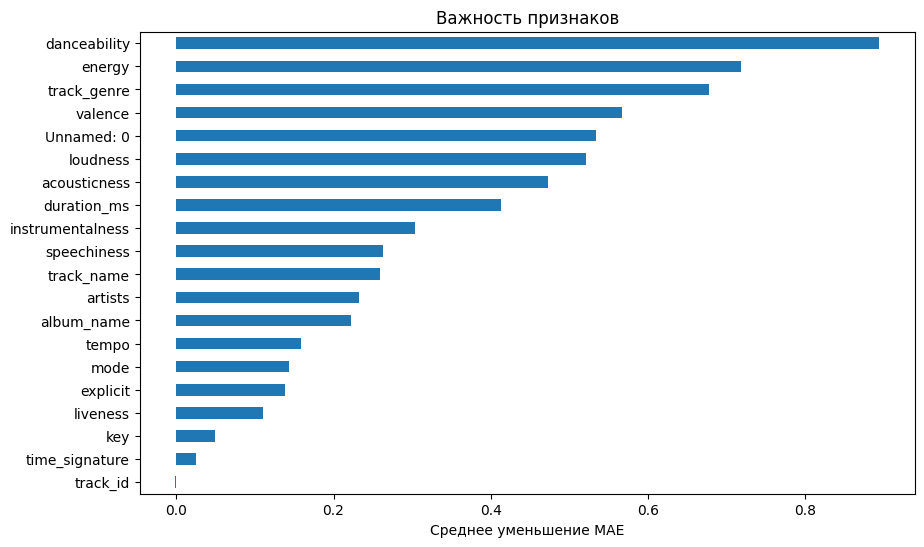

In [27]:
# Важность признаков с помощью permutation importance
result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42, scoring='neg_mean_absolute_error')
importances = pd.Series(result.importances_mean, index=X.columns)

# Визуализация важности признаков
importances.sort_values().plot(kind='barh', figsize=(10,6))
plt.title('Важность признаков')
plt.xlabel('Среднее уменьшение MAE')
plt.show()